In [1]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx
from torch_geometric.datasets import Planetoid


In [2]:

def readDataset():
    dataset=Planetoid(root=r"./Cora",name="Cora")

    return dataset


In [3]:
print(" The number of classes contained in the network data :",readDataset().num_classes)
print(" Number of characteristics of network data edge :",readDataset().num_edge_features)
print(" Number of network data sides :",readDataset().data.edge_index.shape[1]/2) #  Divide 2 yes OOC The organizational form of 
print(" Characteristic number of network data nodes :",readDataset().num_node_features)
print(" Number of network data nodes :",readDataset().data.x.shape[0])


 The number of classes contained in the network data : 7
 Number of characteristics of network data edge : 0
 Number of network data sides : 5278.0
 Characteristic number of network data nodes : 1433
 Number of network data nodes : 2708


In [5]:
def values_graph():
    # # Graph connectivity in COO format with shape [2, num_edges]
    edge_index = readDataset().data.edge_index

    # # Edge feature matrix with shape [num_edges, num_edge_features]
    edge_attr = readDataset().data.edge_attr #None

    # # Node feature matrix with shape [num_nodes, num_node_features]
    x = readDataset().data.x

    # # Graph-level or node-level ground-truth labels with arbitrary shape.
    y = readDataset().data.y

    # # Node position matrix with shape [num_nodes, num_dimensions]
    pos = readDataset().data.pos #None

    # # Rest
    batch = readDataset().data.batch #None
    keys = readDataset().data.keys
    edge_weight = readDataset().data.edge_weight #None
    node_stores = readDataset().data.node_stores #?
    edge_stores = readDataset().data.edge_stores #?

    print("edge_index", edge_index)
    print("edge_attr", edge_attr)
    print("Node feature matrix", x)
    print("Graph-level or node-level", y)
    print("Node position",pos)

    

    return x,y,edge_index,edge_attr

In [13]:
def Plot_Graph(x,y,edge_index,edge_attr):
    graph = data.Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)
    for prop in graph:
        print(prop)

    vis = to_networkx(graph)

    node_labels = graph.y.numpy()

    import matplotlib.pyplot as plt
    plt.figure(1, figsize=(15,13))
    nx.draw(vis, cmap=plt.get_cmap("Set3"), node_color=node_labels, node_size=70, linewidths=6)
    plt.show()    


edge_index tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])
edge_attr None
Node feature matrix tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Graph-level or node-level tensor([3, 4, 4,  ..., 3, 3, 3])
Node position None
('x', tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]))
('edge_index', tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]]))
('y', tensor([3, 4, 4,  ..., 3, 3, 3]))


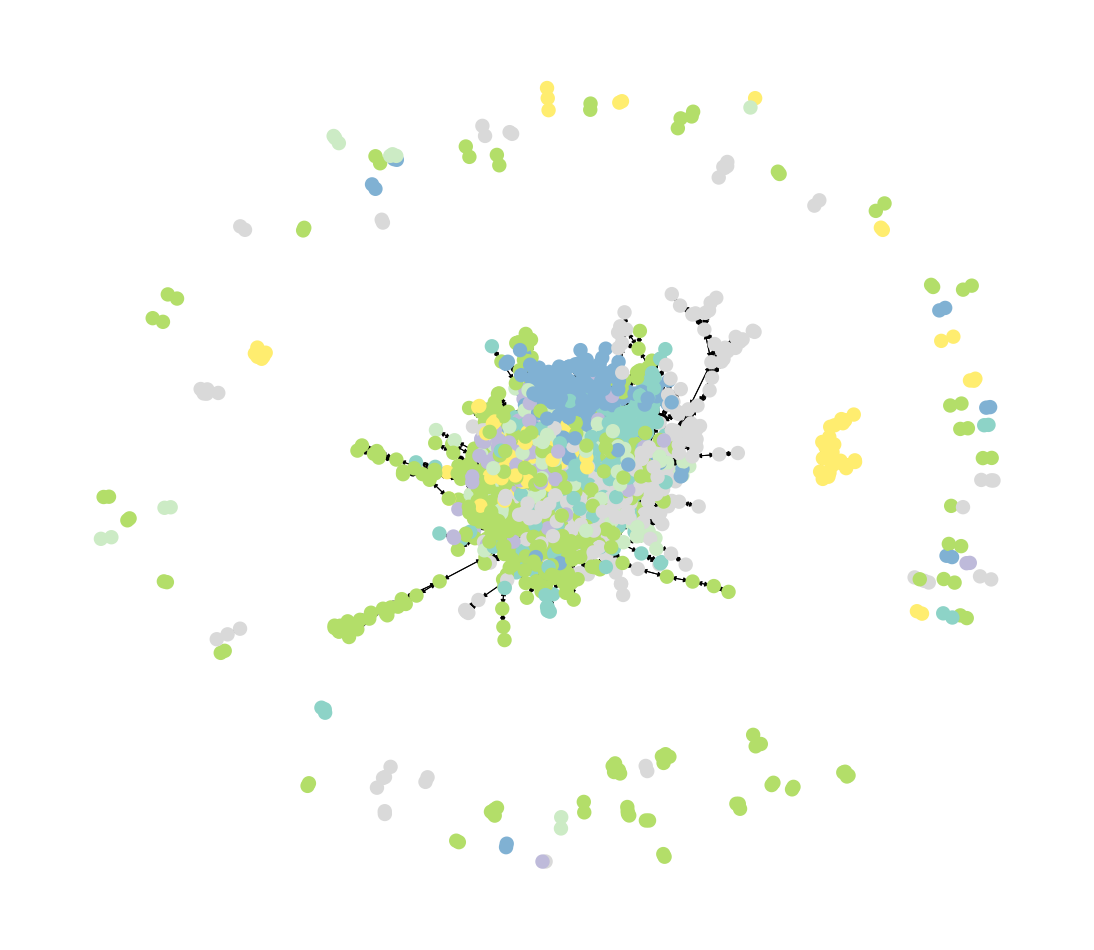

In [14]:
x,y,edge_index,edge_attr = values_graph()
Plot_Graph(x,y,edge_index,edge_attr)